# Bootcamp Data Science Aplicada - Alura

# Módulo 3 - Análise e Previsão de Séries Temporais

Notebook para o acompanhamento das aulas e resoluções dos desafios propostos. Caso necessário, dividirei em mais de um notebook.

# Aula 01 - Entendendo a Série Temporal

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import warnings
warnings.filterwarnings('ignore')

In [2]:
dados = pd.read_csv('../data/dados_covid_sp.csv', sep = ';')

In [3]:
dados.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9


In [4]:
# sns.lineplot(x = 'datahora', y = 'casos', data = dados)

In [5]:
dados['datahora'] = pd.to_datetime(dados['datahora'], format = '%Y-%m-%d')

- https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

<AxesSubplot:xlabel='datahora', ylabel='casos'>

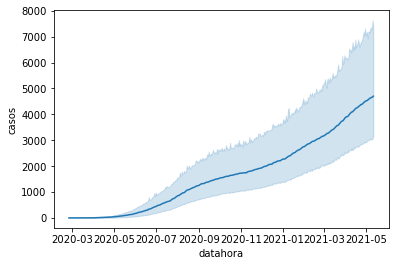

In [6]:
sns.lineplot(x = 'datahora', y = 'casos', data = dados)

In [7]:
mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (15, 8)

In [8]:
eixo_x = np.linspace(-2, 2, 100)

In [9]:
y_exp = np.exp(eixo_x)

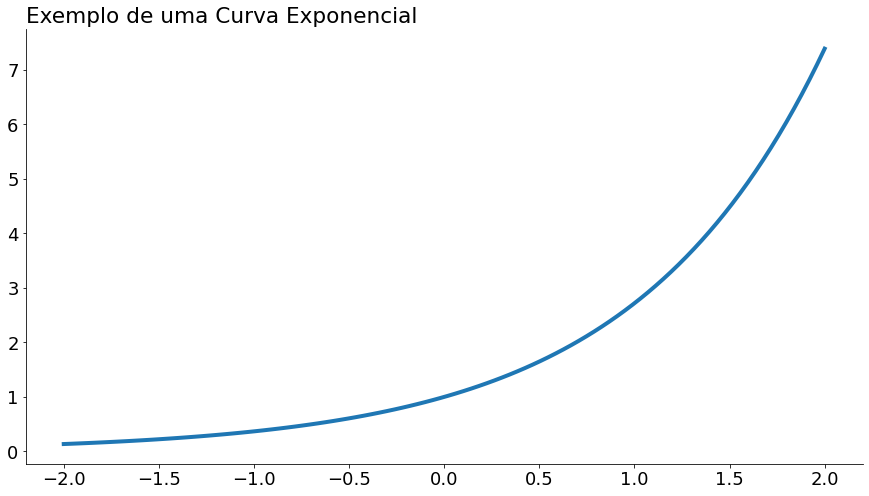

In [60]:
sns.lineplot(x = eixo_x, y = y_exp, linewidth = 4)
plt.title('Exemplo de uma Curva Exponencial', loc = 'left')
sns.despine()
plt.show()

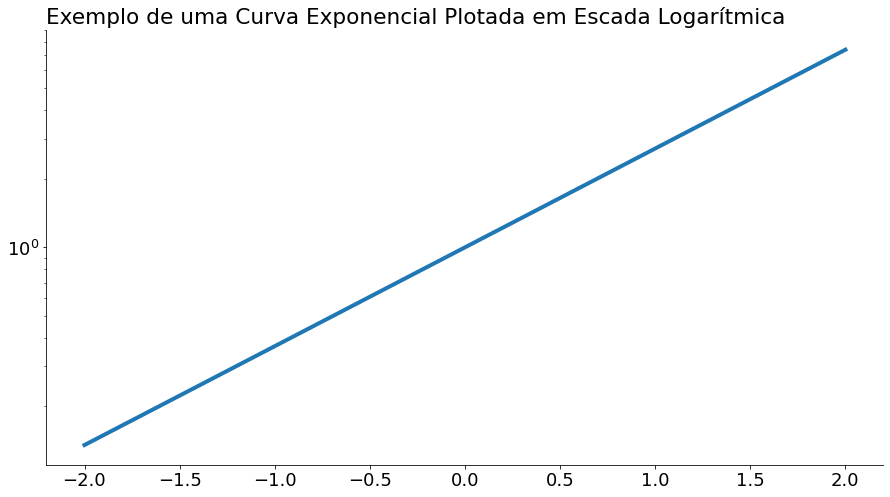

In [63]:
sns.lineplot(x = eixo_x, y = y_exp, linewidth = 4)
plt.yscale('log')
plt.title('Exemplo de uma Curva Exponencial Plotada em Escada Logarítmica', loc = 'left')
sns.despine()
plt.show()

In [12]:
dados_sp = dados.query('nome_munic == "São Paulo"')

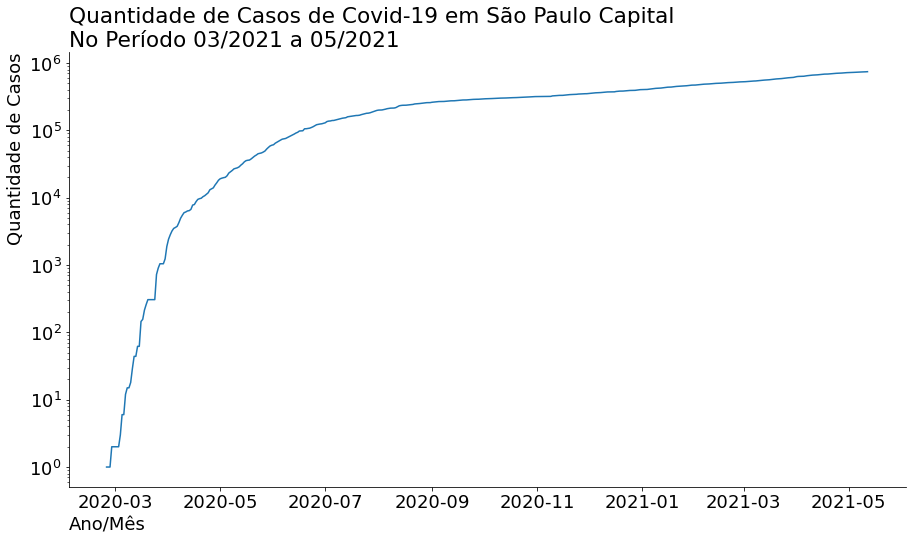

In [66]:
sns.lineplot(x = 'datahora', y = 'casos', data = dados_sp)
plt.yscale('log') # escala logarítmica
plt.title('Quantidade de Casos de Covid-19 em São Paulo Capital\nNo Período 03/2021 a 05/2021', loc = 'left')
plt.xlabel('Ano/Mês', loc = 'left')
plt.ylabel('Quantidade de Casos', loc = 'top')
sns.despine()
plt.show()

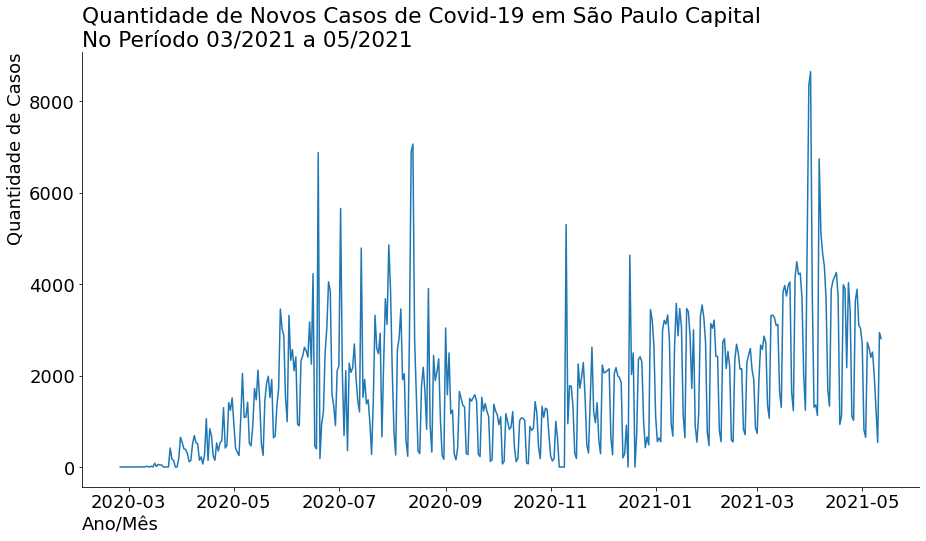

In [67]:
sns.lineplot(x = 'datahora', y = 'casos_novos', data = dados_sp)
plt.title('Quantidade de Novos Casos de Covid-19 em São Paulo Capital\nNo Período 03/2021 a 05/2021', loc = 'left')
plt.xlabel('Ano/Mês', loc = 'left')
plt.ylabel('Quantidade de Casos', loc = 'top')
sns.despine()
plt.show()

In [15]:
dados_exemplo = pd.DataFrame(data = np.linspace(1, 10, 10))

In [16]:
dados_exemplo.head()

,0
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0


In [17]:
dados_exemplo.columns = ['coluna1']

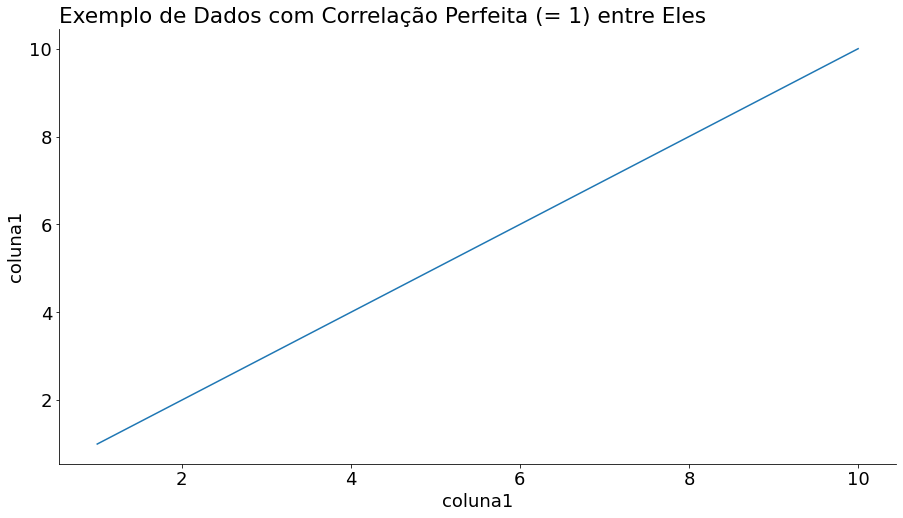

In [69]:
sns.lineplot(x = 'coluna1', y = 'coluna1', data = dados_exemplo)
plt.title('Exemplo de Dados com Correlação Perfeita (= 1) entre Eles', loc = 'left')
sns.despine()
plt.show()

In [19]:
dados_exemplo['diferenciado'] = dados_exemplo.diff()

In [20]:
dados_exemplo

,coluna1,diferenciado
0,1.0,NaN
1,2.0,1.0
2,3.0,1.0
3,4.0,1.0
4,5.0,1.0
5,6.0,1.0
6,7.0,1.0
7,8.0,1.0
8,9.0,1.0
9,10.0,1.0


<AxesSubplot:xlabel='coluna1', ylabel='coluna1'>

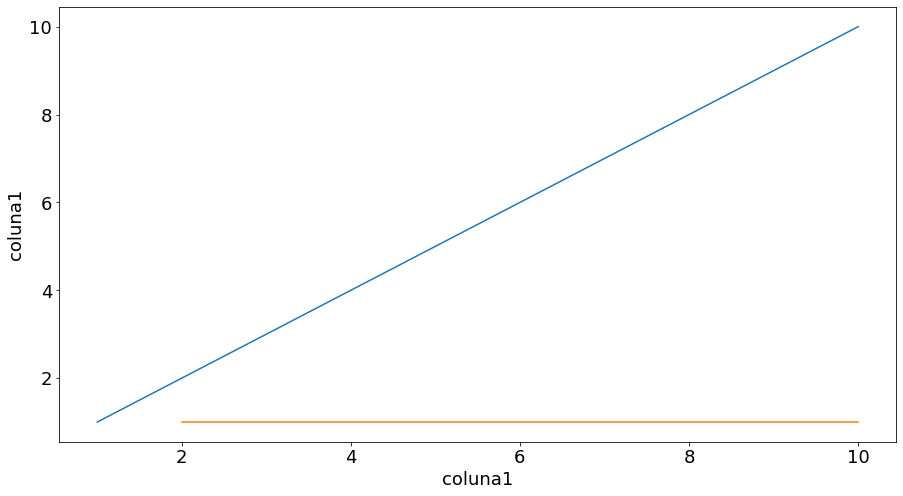

In [21]:
sns.lineplot(x = 'coluna1', y = 'coluna1', data = dados_exemplo)
sns.lineplot(x = 'coluna1', y = 'diferenciado', data = dados_exemplo)

In [22]:
dados_sp['taxa_de_crescimento_casos'] = dados_sp['casos_novos'].diff()
dados_sp['taxa_de_crescimento_obitos'] = dados_sp['obitos_novos'].diff()

<AxesSubplot:xlabel='datahora', ylabel='taxa_de_crescimento_casos'>

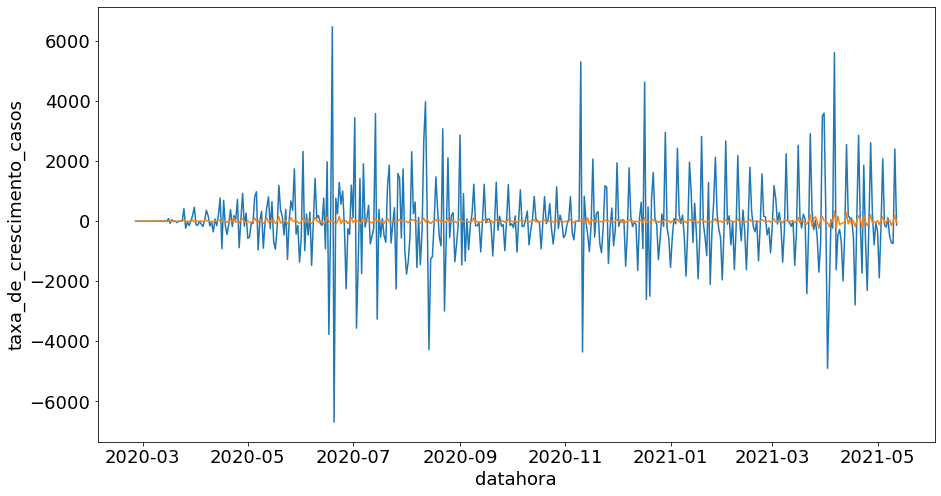

In [23]:
sns.lineplot(x = 'datahora', y = 'taxa_de_crescimento_casos', data = dados_sp)
sns.lineplot(x = 'datahora', y = 'taxa_de_crescimento_obitos', data = dados_sp)

<AxesSubplot:xlabel='datahora', ylabel='taxa_de_crescimento_obitos'>

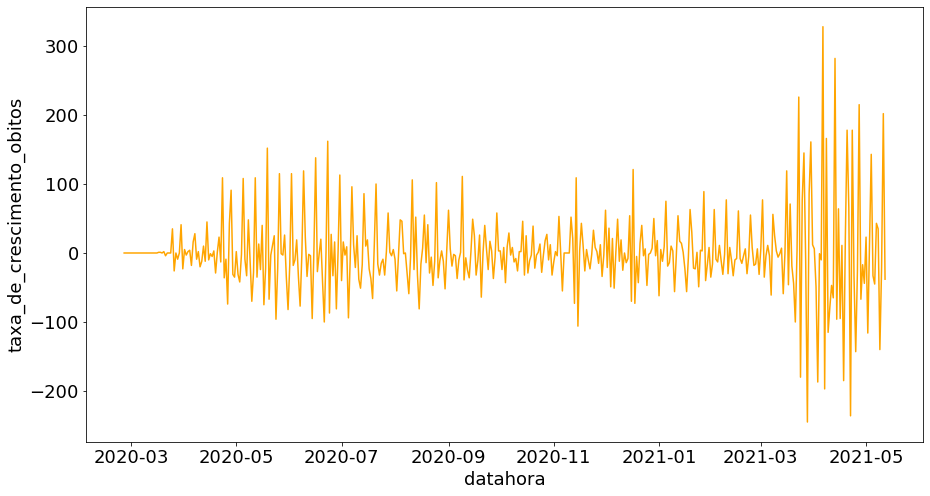

In [24]:
sns.lineplot(x = 'datahora', y = 'taxa_de_crescimento_obitos', data = dados_sp, color = 'orange')

<BarContainer object of 443 artists>

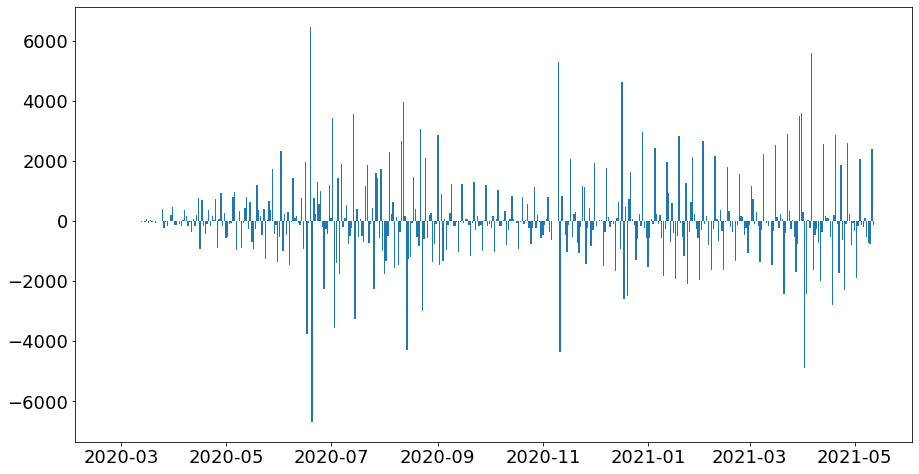

In [25]:
plt.bar(dados_sp['datahora'], dados_sp['taxa_de_crescimento_casos'])

In [26]:
dados_sp['ano'] = pd.DatetimeIndex(dados_sp['datahora']).year

In [27]:
dados_2021 = dados_sp.query('ano == 2021')

<BarContainer object of 132 artists>

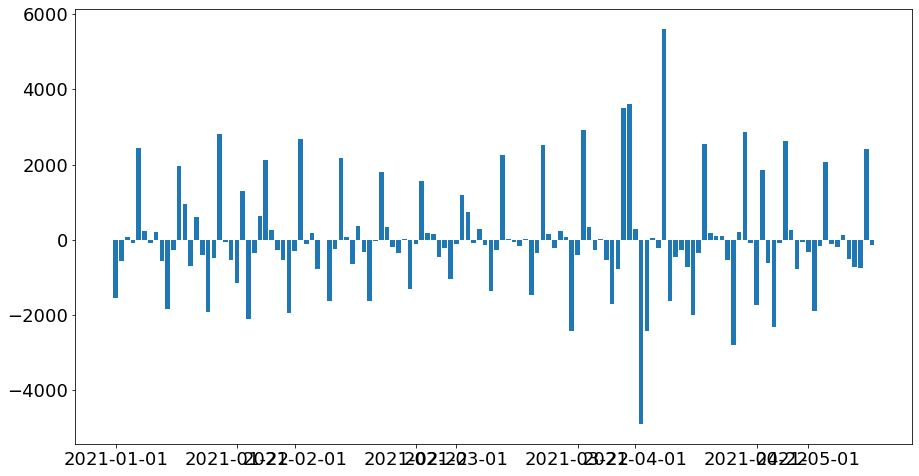

In [28]:
plt.bar(dados_2021['datahora'], dados_2021['taxa_de_crescimento_casos'])

In [29]:
# média móvel
dados_sp['media_movel_casos'] = dados_sp['casos_novos'].rolling(window = 7, center = False).mean()
dados_sp['media_movel_obitos'] = dados_sp['obitos_novos'].rolling(window = 7, center = False).mean()

<AxesSubplot:xlabel='datahora', ylabel='casos_novos'>

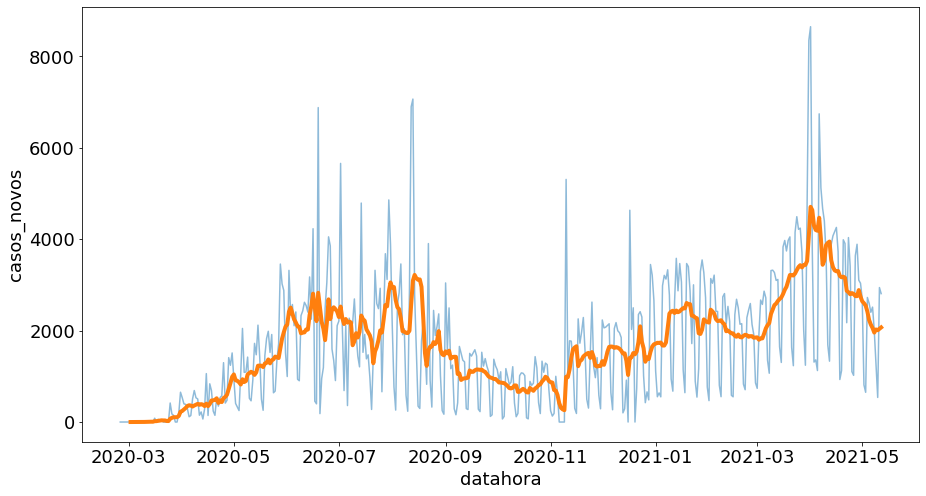

In [30]:
sns.lineplot(x = 'datahora', y = 'casos_novos', data = dados_sp, alpha = 0.5)
sns.lineplot(x = 'datahora', y = 'media_movel_casos', data = dados_sp, linewidth = 4)

<AxesSubplot:xlabel='casos_novos', ylabel='obitos_novos'>

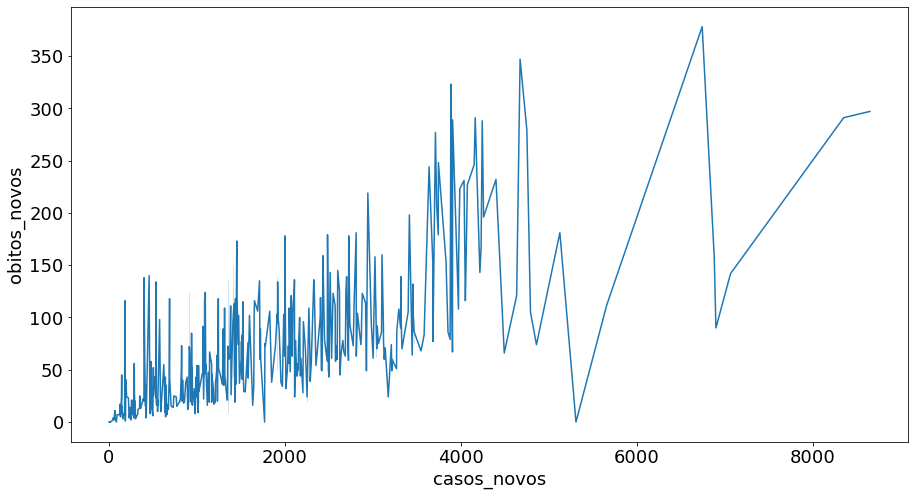

In [31]:
sns.lineplot(x = 'casos_novos', y = 'obitos_novos', data = dados_sp)

In [32]:
dados_202101 = dados_sp.query('mes == 1 & ano == 2021')
dados_202102 = dados_sp.query('mes == 2 & ano == 2021')

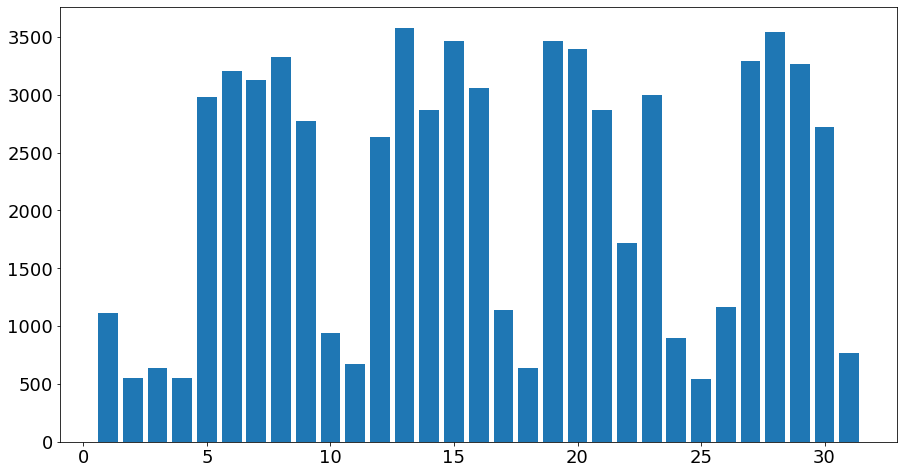

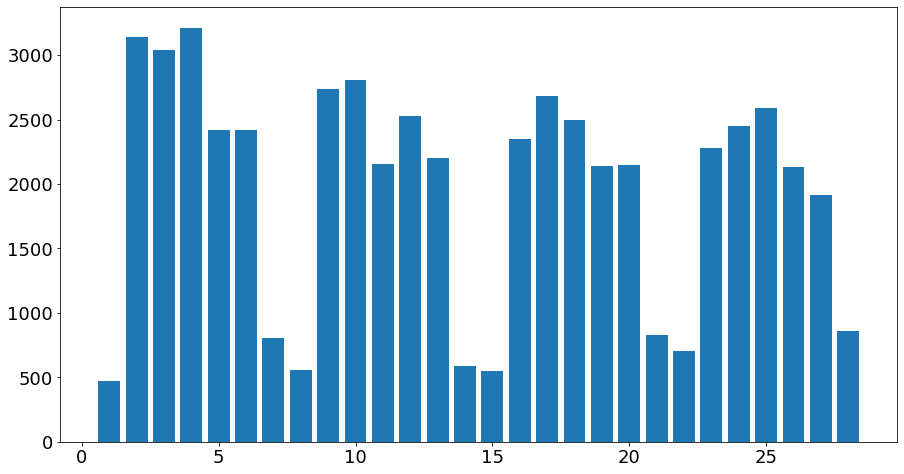

In [33]:
plt.bar(np.linspace(1, 31, 31), dados_202101['casos_novos'])
plt.show()
plt.bar(np.linspace(1, 28, 28), dados_202102['casos_novos'])
plt.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

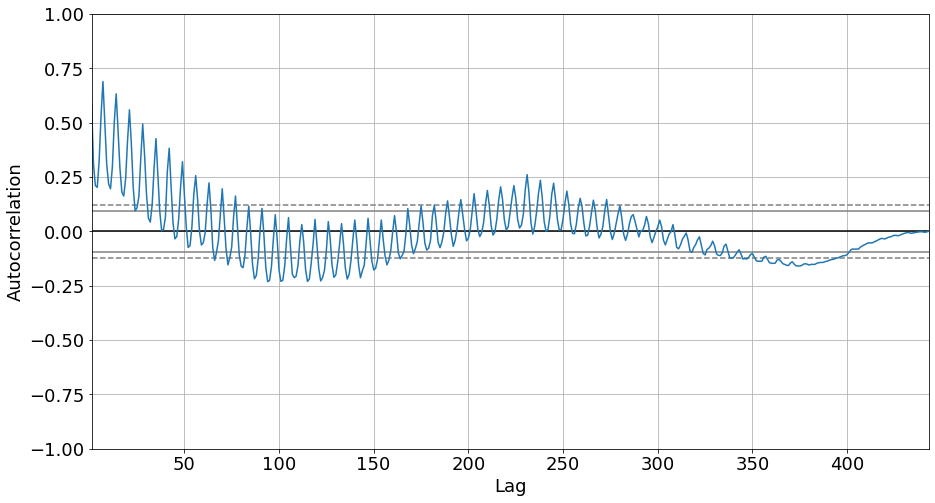

In [34]:
autocorrelation_plot(dados_sp['casos_novos'])

In [36]:
dados_sp.shape

(443, 31)

In [35]:
aleatorio = np.random.rand(443)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

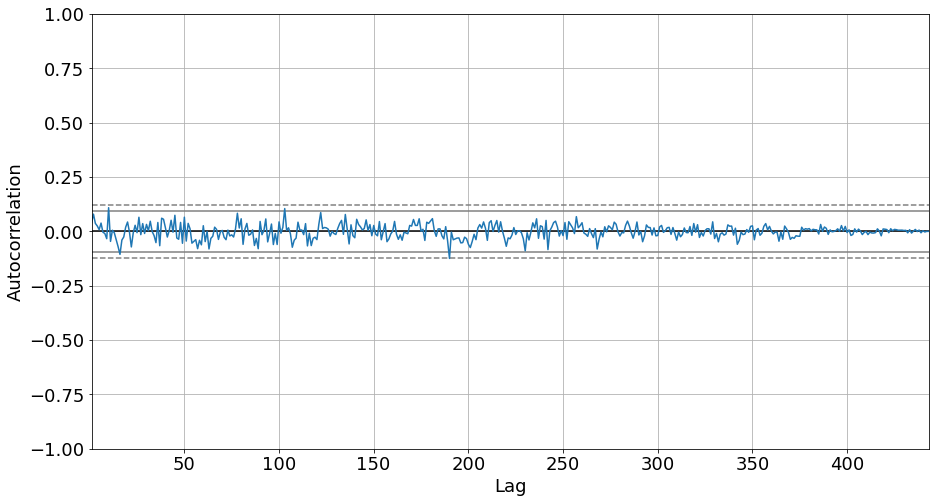

In [37]:
autocorrelation_plot(aleatorio)

# Desafio 01: Um notebook sem warnings ✅

# Desafio 02: Pico taxa de casos novos coincide com taxa dos óbitos novos.

In [41]:
dados_202008 = dados_sp.query('mes == 8 & ano == 2020')
dados_202009 = dados_sp.query('mes == 9 & ano == 2020')

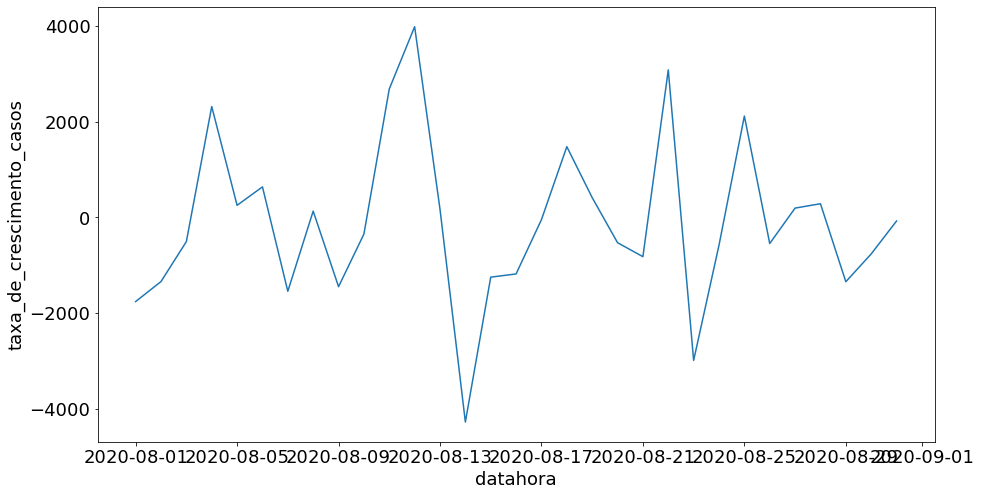

In [48]:
ax1 = sns.lineplot(x = 'datahora', y = 'taxa_de_crescimento_casos', data = dados_202008)

<AxesSubplot:xlabel='datahora', ylabel='taxa_de_crescimento_obitos'>

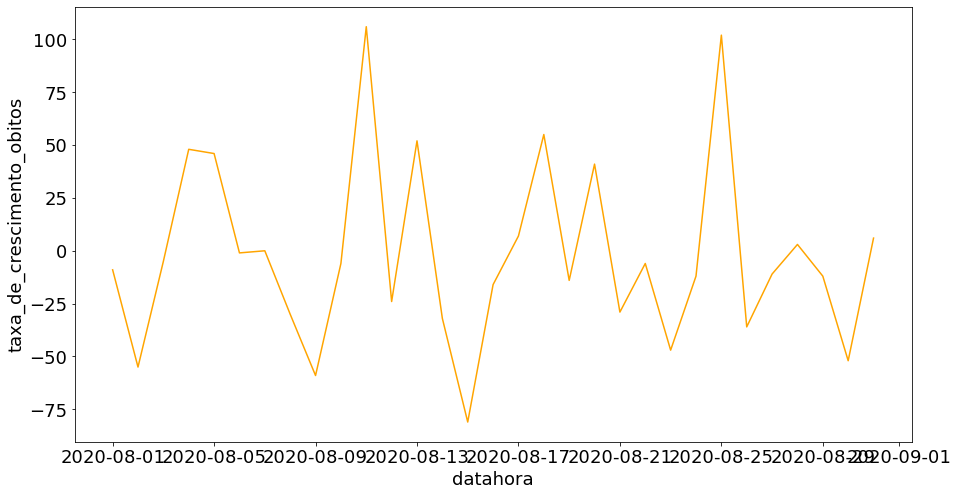

In [49]:
sns.lineplot(x = 'datahora', y = 'taxa_de_crescimento_obitos', data = dados_202008, color = 'orange')

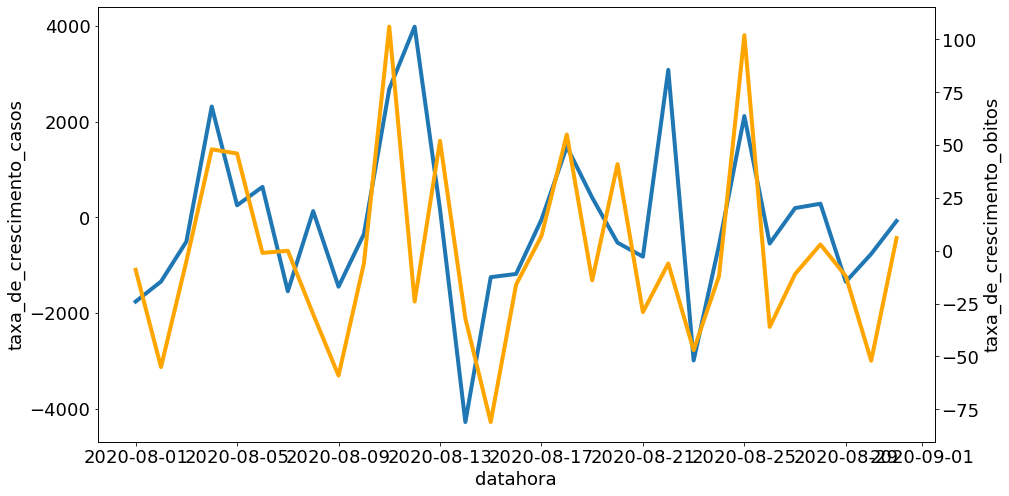

In [52]:
ax1 = sns.lineplot(x = 'datahora', y = 'taxa_de_crescimento_casos', data = dados_202008, linewidth = 4)
ax2 = ax1.twinx()
ax2 = sns.lineplot(x = 'datahora', y = 'taxa_de_crescimento_obitos', data = dados_202008, linewidth = 4, color = 'orange')

O gráfico acima foi feito para tentarmos checar se os picos nos números de casos e no número de óbitos coincidem. Escolhemos o mês de agosto de 2008.

# Desafio 03: Fazer melhorias nos gráficos.

# Desafio 04: Gerar o gráfico da média móvel do número de óbitos e mudar os gráficos de casos para barras.

# Desafio 05: Mover o número de óbitos alguns dias para verificar o resultado no gráfico.

# Desafio 06: Função de correlação cruzada dos óbitos e casos.

# Desafio 07: Estudar outros municípios.